### Upscaling Images with Real-ESRGAN
This notebook is an implementation of ESRGAN Real ESRGAN is an advancement on ESRGAN, or Enhanced super-resolution generative adversial network, which is further, an evolution of the original SRGAN and is designed to enhance the resoultion of images. GAN architecture is based on two networks which are competing against each other a generator and a discriminator. The generator attempts to create high res images while discriminator distinguishes between real and generated images.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#clone the repo install dependencies
!pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git

  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-40o8mn96
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-40o8mn96
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done
  Created wheel for RealESRGAN: filename=RealESRGAN-1.0-py3-none-any.whl size=9107 sha256=e581e43125c08a8aaefd9fa7bc0dc9609a855e2e4cd5fe49ba5ff7a177059209
  Stored in directory: /tmp/pip-ephem-wheel-cache-4af8at6v/wheels/91/40/63/13fbbf71a56f91ddc8c23df0d1ba9e695c66661b435c3a494f
Successfully built RealESRGAN


In [3]:
#install torch
!pip install torch torchvision

In [4]:
# install dependecies and libraries
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('weights/RealESRGAN_x4.pth', download=True)

In [5]:
#getting a web image to run the model
!wget -q https://raw.githubusercontent.com/ai-forever/Real-ESRGAN/main/inputs/lr_face.png -O original.png

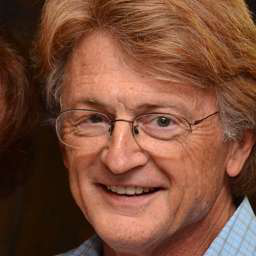

In [9]:
#Image from the web
from IPython.display import Image
Image("https://raw.githubusercontent.com/ai-forever/Real-ESRGAN/main/inputs/lr_face.png", width=200, height=100)

In [6]:
# running the model and converting the image to high res
from PIL import Image
import numpy as np

path_to_image = 'original.png'
image = Image.open(path_to_image).convert('RGB')

sr_image = model.predict(image)

sr_image.save('sr_face.png')

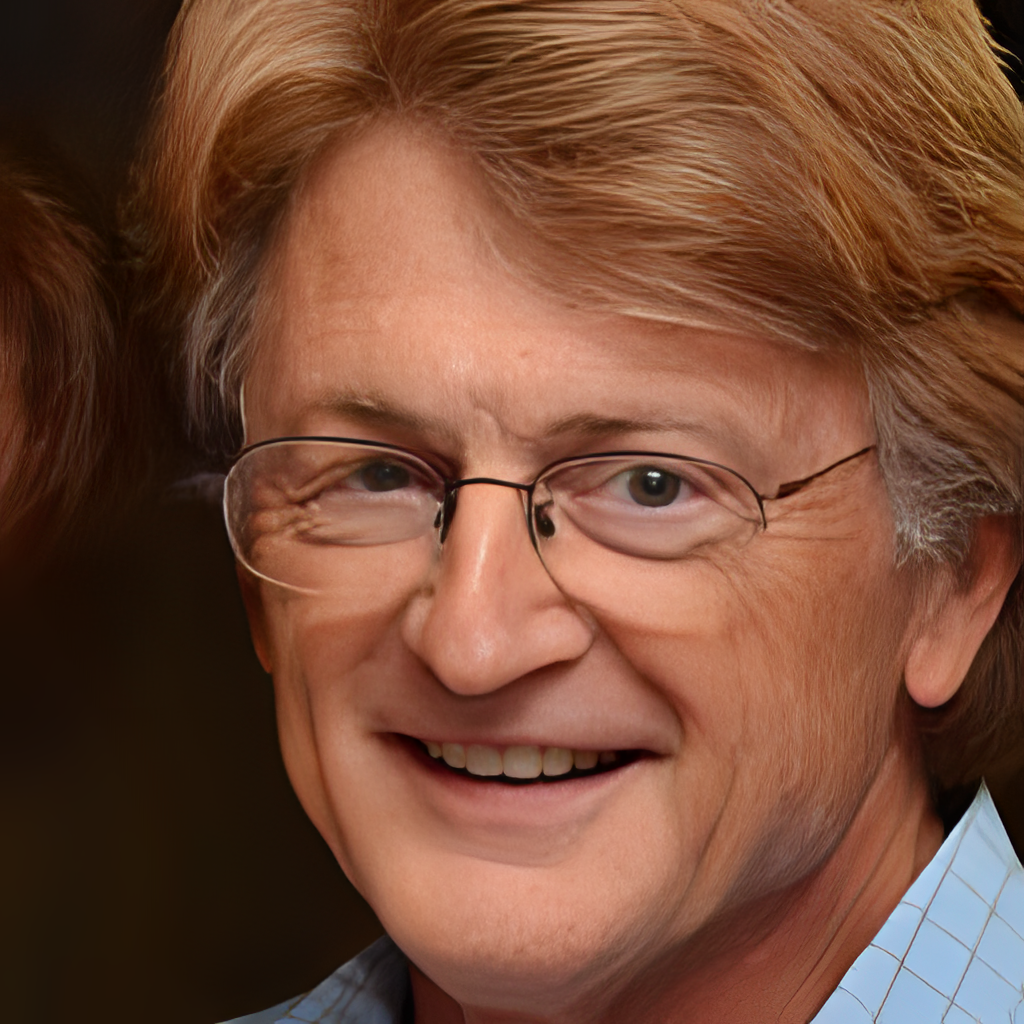

In [7]:
sr_image

In [7]:
# import the modules
import os
from os import listdir

sr_image_fold = []
 
# get the path/directory
folder_dir = "/notebooks/quick_start_images"
for images in os.listdir(folder_dir):
    if images.endswith ('.png') or images.endswith('.jpg') or images.endswith('.jpeg'):
        image_fold = Image.open(f"/notebooks/quick_start_images/{images}").convert('RGB')
        
        sr_image_fold.append(model.predict(image_fold))

        
        #print(images)

In [1]:
for image in sr_image_fold:
    image.show()

### References
## https://arxiv.org/pdf/2107.10833.pdf
## https://xinntao.github.io/projects/RealESRGAN_src/RealESRGAN_poster.pdf
## https://github.com/xinntao/Real-ESRGAN
## https://arxiv.org/pdf/1809.00219.pdf
## https://arxiv.org/pdf/1802.05957.pdf